## 이진분류에 사용되는 평가지표

In [1]:
# from sklearn.metrics import confusion_matrix
import numpy as np
confmat = np.array([[357, 43], [90, 124]], dtype=np.int32)
confmat

array([[357,  43],
       [ 90, 124]])

In [2]:
accuracy = (357 + 124) / (357 + 124 + 43 + 90)
accuracy

0.7833876221498371

In [4]:
precision = 124 / (43 + 124)
precision

0.7425149700598802

In [5]:
recall = 124 / (90+124)
recall

0.5794392523364486

In [6]:
f1 = 2*recall*precision / (recall + precision)
f1

0.6509186351706037

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

iris = load_iris()
X = iris.data
y = (iris.target == 2).astype(np.int32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [8]:
from sklearn.metrics import accuracy_score, accuracy_score, precision_score
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [9]:
lr_clf = LogisticRegression(max_iter=1000)

y_pred = cross_val_predict(lr_clf, X_train, y_train, cv=3)
print('confusion_matrix: \n', confusion_matrix( y_train, y_pred))
print('accuracy: \t', accuracy_score(y_train , y_pred))
print('precision: \t', precision_score(y_train , y_pred))
print('recall: \t', recall_score(y_train , y_pred))
print('f1_score: \t', f1_score(y_train,y_pred))

confusion_matrix: 
 [[76  4]
 [ 2 38]]
accuracy: 	 0.95
precision: 	 0.9047619047619048
recall: 	 0.95
f1_score: 	 0.9268292682926829


ROC_AUC 

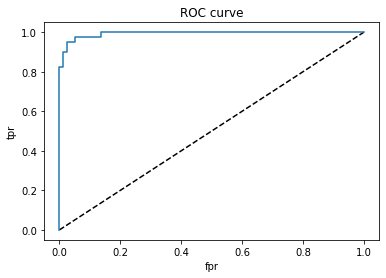

In [10]:
y_scores = cross_val_predict(lr_clf, X_train, y_train, cv=3, 
                             method="decision_function")
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [11]:
roc_auc_score(y_train,y_scores)

0.993125

# RNN을 이용한 시퀀스 학습

In [14]:
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# 1. 데이터 준비
x = array([[.1, .2, .3], [.2, .3, .4], [.3, .4, .5], [.4, .5, .6]])
y = array([.4, .5, .6, .7])

print('x shape: ', x.shape)
print('y shape: ', y.shape)

x = x.reshape((x.shape[0], x.shape[1], 1))
print('x shape: ', x.shape)

x shape:  (4, 3)
y shape:  (4,)
x shape:  (4, 3, 1)


In [16]:
# 2. LSTM 아키텍쳐(모델) 구성
model = Sequential()
model.add(LSTM(8, return_sequences=True, input_shape=(3, 1)))
model.add(LSTM(16))
model.add(Dense(8))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 3, 8)              320       
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                1600      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 2,065
Trainable params: 2,065
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 3. 모델의 컴파일 및 실행
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(x, y, epochs=100, batch_size=1)

Epoch 1/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6925
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6912
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6906
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6897
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6893
Epoch 6/100
4/4 [==============================] - 0s 20ms/step - loss: 0.6887
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6882
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6881
Epoch 9/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6873
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6870
Epoch 11/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6871
Epoch 12/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6867
Epoch 13/100
4/4 [==============================] - 0s 1

In [18]:
# 4. 추론 (예측)
x_input = array([.6, .7, .8]).reshape((1, 3, 1))

y_pred = model.predict(x_input)
print(y_pred)

[[0.88299394]]


# RNN을 이용한 필기체 인식

In [19]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [20]:
x_train.shape

(60000, 28, 28)

In [21]:
model = Sequential()
model.add(LSTM(64, input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 64)                23808     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 33,418
Trainable params: 33,418
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(x_train, y_train, epochs=5)
print(model.evaluate(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.3927 - accuracy: 0.8725
Epoch 2/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1248 - accuracy: 0.9618
Epoch 3/5
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0913 - accuracy: 0.9727
Epoch 4/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0724 - accuracy: 0.9779
Epoch 5/5
313/313 [==============================] - 5s 16ms/step - loss: 0.0690 - accuracy: 0.9777
[0.0689738318324089, 0.9776999950408936]


In [24]:
model.evaluate?

# 한국어를 영어로 번역하는 예

In [108]:
docs = ['나는 당신을 사랑합니다.', 
        '나는 당신을 미워합니다.',
        '나는 당신을 사랑하지 않습니다.',
       'i love you.', 
       'i hate you.', 
       'i do not love you.']

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)

{'나는': 1, '당신을': 2, 'i': 3, 'you': 4, 'love': 5, '사랑합니다': 6, '미워합니다': 7, '사랑하지': 8, '않습니다': 9, 'hate': 10, 'do': 11, 'not': 12}


In [109]:
x = token.texts_to_sequences(docs)
print(x)

[[1, 2, 6], [1, 2, 7], [1, 2, 8, 9], [3, 5, 4], [3, 10, 4], [3, 11, 12, 5, 4]]


In [110]:
pad_x = pad_sequences(x, 5, padding='post') # 시퀀스 앞 부분에 대한 예측이 더 잘되므로 padding으로 뒷쪽을 채움
print(pad_x)

[[ 1  2  6  0  0]
 [ 1  2  7  0  0]
 [ 1  2  8  9  0]
 [ 3  5  4  0  0]
 [ 3 10  4  0  0]
 [ 3 11 12  5  4]]


In [111]:
one_hot = to_categorical(pad_x)
print(one_hot.shape)
one_hot

(6, 5, 13)


array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
  

In [112]:
# 2. LSTM 신경망 아키텍쳐 준비

model = Sequential()
model.add(LSTM(16, return_sequences=True, input_shape=(5, 13)))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(13, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_39 (LSTM)               (None, 5, 16)             1920      
_________________________________________________________________
lstm_40 (LSTM)               (None, 5, 32)             6272      
_________________________________________________________________
lstm_41 (LSTM)               (None, 5, 64)             24832     
_________________________________________________________________
dense_49 (Dense)             (None, 5, 32)             2080      
_________________________________________________________________
dense_50 (Dense)             (None, 5, 16)             528       
_________________________________________________________________
dense_51 (Dense)             (None, 5, 13)             221       
Total params: 35,853
Trainable params: 35,853
Non-trainable params: 0
_________________________________________________

In [113]:
one_hot.shape

(6, 5, 13)

In [114]:
# 학습
import numpy as np
model.fit(one_hot[:3], one_hot[3:], epochs=50)
print(model.evaluate(one_hot[:3], one_hot[3:]))
predicted = model.predict(one_hot[:3])
print(np.argmax(predicted, axis=2))

# 추론 결과의 디코딩
for arr in np.argmax(predicted, axis=2):
    for j in arr:
        if j == 0:
            continue
        else:
            print(token.index_word[j], end=' ')
    print()

Epoch 1/50
1/1 [==============================] - 0s 968us/step - loss: 2.5648 - accuracy: 0.0667
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 2.5608 - accuracy: 0.2000
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 2.5567 - accuracy: 0.2667
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 2.5526 - accuracy: 0.2667
Epoch 5/50
1/1 [==============================] - 0s 1ms/step - loss: 2.5482 - accuracy: 0.2667
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 2.5434 - accuracy: 0.2667
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 2.5383 - accuracy: 0.2667
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 2.5329 - accuracy: 0.2667
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 2.5270 - accuracy: 0.2667
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.5206 - accuracy: 0.2667
Epoch 11/50
1/1 [====================

* 위의 모델은 LSTM 레이어가 3개인 복잡한 아키텍쳐이지만 accuracy가 좋아지지 않음.
* 아래와 같이 좀 더 단순하지만 타겟레이블의 모양에 맞추어 정교하게 아키텍쳐 변경
    - 최종 출력층의 활성화함수는 sigmoid로 하여 이진분류 케이스로 취급
    - 이진분류 케이스이므로 loss는 binary_crossentropy로 변경

In [117]:
from tensorflow.keras.layers import Flatten, Reshape
import tensorflow as tf


model = Sequential()
model.add(LSTM(13, return_sequences=True, input_shape=(5,13)))
model.add(Flatten())
model.add(Dense(130, activation='relu'))
model.add(Dense(65, activation='sigmoid'))
model.add(Reshape((5,13)))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

model.fit(one_hot[:3], one_hot[3:], epochs=100)
print(model.evaluate(one_hot[:3], one_hot[3:]))
predicted = model.predict(one_hot[:3])
print(np.argmax(predicted, axis=2))


Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_43 (LSTM)               (None, 5, 13)             1404      
_________________________________________________________________
flatten_11 (Flatten)         (None, 65)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 130)               8580      
_________________________________________________________________
dense_55 (Dense)             (None, 65)                8515      
_________________________________________________________________
reshape_9 (Reshape)          (None, 5, 13)             0         
Total params: 18,499
Trainable params: 18,499
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.0667
Epoch 2/100
1/1 [=

1/1 [==============================] - 0s 2ms/step - loss: 0.0778 - accuracy: 0.8000
Epoch 75/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0767 - accuracy: 0.8000
Epoch 76/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0757 - accuracy: 0.8000
Epoch 77/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0747 - accuracy: 0.8000
Epoch 78/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0737 - accuracy: 0.8000
Epoch 79/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0727 - accuracy: 0.8000
Epoch 80/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0718 - accuracy: 0.8000
Epoch 81/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0709 - accuracy: 0.8000
Epoch 82/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0699 - accuracy: 0.8000
Epoch 83/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0691 - accuracy: 0.8000
Epoch 84/100
1/1 [===============

In [118]:
# 추론 결과의 디코딩
for arr in np.argmax(predicted, axis=2):
    for j in arr:
        if j == 0:
            continue
        else:
            print(token.index_word[j], end=' ')
    print()

i love you 
i hate you 
i do not love you 


정확한 번역 결과를 얻을 수 있음.